# FMA Song genre prediction

## Read in and clean data

In [1]:
import pandas as pd


tracks = pd.read_csv('./tracks-clean-no-nans.csv')
tracks = tracks.loc[tracks['genre_top'].isin(['Hip-Hop', 'Rock'])]
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17734 entries, 0 to 49597
Data columns (total 21 columns):
track_id         17734 non-null int64
bit_rate         17734 non-null int64
comments         17734 non-null int64
composer         166 non-null object
date_created     17734 non-null object
date_recorded    1898 non-null object
duration         17734 non-null int64
favorites        17734 non-null int64
genre_top        17734 non-null object
genres           17734 non-null object
genres_all       17734 non-null object
information      482 non-null object
interest         17734 non-null int64
language_code    4089 non-null object
license          17714 non-null object
listens          17734 non-null int64
lyricist         53 non-null object
number           17734 non-null int64
publisher        52 non-null object
tags             17734 non-null object
title            17734 non-null object
dtypes: int64(8), object(13)
memory usage: 3.0+ MB


In [2]:
# Task: Figure out and drop NAs appropriately
tracks.isna().sum().sort_values()

track_id             0
number               0
listens              0
interest             0
tags                 0
genres               0
genre_top            0
genres_all           0
duration             0
date_created         0
comments             0
bit_rate             0
favorites            0
title                0
license             20
language_code    13645
date_recorded    15836
information      17252
composer         17568
lyricist         17681
publisher        17682
dtype: int64

In [3]:
# Task: Figure out and drop NAs appropriately
tracks.isna().mean().sort_values()

track_id         0.000000
number           0.000000
listens          0.000000
interest         0.000000
tags             0.000000
genres           0.000000
genre_top        0.000000
genres_all       0.000000
duration         0.000000
date_created     0.000000
comments         0.000000
bit_rate         0.000000
favorites        0.000000
title            0.000000
license          0.001128
language_code    0.769426
date_recorded    0.892974
information      0.972821
composer         0.990639
lyricist         0.997011
publisher        0.997068
dtype: float64

In [4]:
# For columns above 60% NA we don't care for the column, so drop it. For less, drop the observations
tracks = (tracks
 .dropna(subset=['license'])
 .dropna(axis=1)
)

tracks.head()

,track_id,bit_rate,comments,date_created,duration,favorites,genre_top,genres,genres_all,interest,license,listens,number,tags,title
0,2,256000,0,2008-11-26 01:48:12,168,2,Hip-Hop,[21],[21],4656,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,3,[],Food
1,3,256000,0,2008-11-26 01:48:14,237,1,Hip-Hop,[21],[21],1470,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,4,[],Electric Ave
2,5,256000,0,2008-11-26 01:48:20,206,6,Hip-Hop,[21],[21],1933,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,6,[],This World
4,134,256000,0,2008-11-26 01:43:19,207,3,Hip-Hop,[21],[21],1126,Attribution-NonCommercial-ShareAlike 3.0 Inter...,943,5,[],Street Music
5,135,256000,1,2008-11-26 01:43:26,837,0,Rock,"[45, 58]","[58, 12, 45]",2484,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,0,[],Father's Day


In [5]:
track_json = pd.read_json('./echonest-clean.json', precise_float=True)
track_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 9 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
track_id            13129 non-null int64
valence             13129 non-null float64
dtypes: float64(8), int64(1)
memory usage: 923.2 KB


In [6]:
# track_metrics = pd.read_csv('./echonest-clean.csv')
track_metrics = pd.read_json('./echonest-clean.json', precise_float=True)
track_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13129 entries, 0 to 13128
Data columns (total 9 columns):
acousticness        13129 non-null float64
danceability        13129 non-null float64
energy              13129 non-null float64
instrumentalness    13129 non-null float64
liveness            13129 non-null float64
speechiness         13129 non-null float64
tempo               13129 non-null float64
track_id            13129 non-null int64
valence             13129 non-null float64
dtypes: float64(8), int64(1)
memory usage: 923.2 KB


In [7]:
track_metrics.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,5,0.621661
3,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,10,0.963590
4,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,134,0.894072


## Merge data frames

In [8]:
# TODO it might make sense to use the trackid as the index from teh beginning,
# faster joins I think and it really *is* the index of this frame
echo_tracks = pd.merge(track_metrics, tracks[['genre_top', 'title', 'track_id']], on='track_id')
echo_tracks.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,track_id,valence,genre_top,title
0,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,2,0.576661,Hip-Hop,Food
1,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,3,0.269240,Hip-Hop,Electric Ave
2,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,5,0.621661,Hip-Hop,This World
3,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,134,0.894072,Hip-Hop,Street Music
4,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,153,0.034018,Rock,Hundred-Year Flood


## PCA analysis and visualization

In [9]:
# Preprocess data by assigning all numerical features to the `data`
# variable and the classes that we want to predict as the `labels` variable
features = echo_tracks.drop(['genre_top', 'title', 'track_id'], axis=1) 
labels = echo_tracks['genre_top']

In [10]:
# TODO should this be done different with K-fold cross-validation? Or should that be a later task?
# Divide the data and the labels into a train and test set
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=10)

array([9.99585355e-01, 1.51825656e-04, 1.07744267e-04, 6.12438154e-05,
       4.50371441e-05, 1.87306522e-05, 1.74272808e-05, 1.26364191e-05])

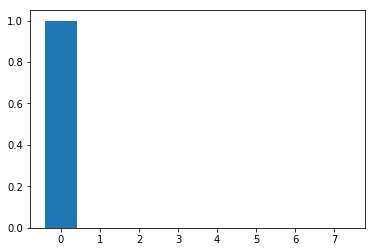

In [11]:
# Discover that the data needs to be scaled 0-1
# TODO, alternatively the tempo column should be dropped or scaled alone since scaling the 
# other columns could remove important difference in the range of those already variables
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

pca = PCA()
pca.fit(train_features)

fig, ax = plt.subplots()
x = range(len(pca.explained_variance_))
y = pca.explained_variance_ratio_
ax.bar(x, y)
y

array([0.24231976, 0.18078029, 0.136972  , 0.12979168, 0.10949952,
       0.08261209, 0.07016865, 0.04785601])

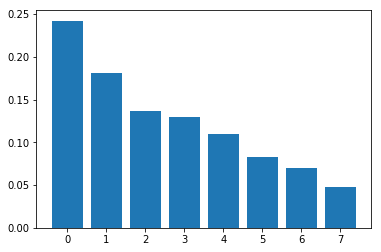

In [12]:
# Do it the right way with scaled data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_train_features = scaler.fit_transform(train_features)

pca = PCA()
pca.fit(scaled_train_features)

fig, ax = plt.subplots()
x = range(len(pca.explained_variance_))
y = pca.explained_variance_ratio_
ax.bar(x, y)
y

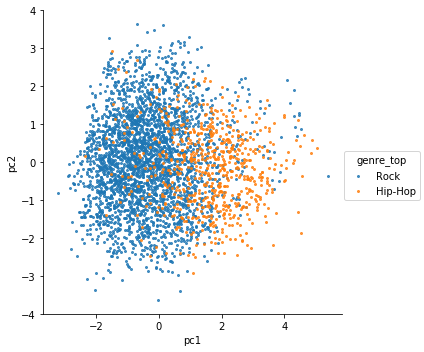

In [13]:
# Create a data frame for plotting with seaborn (alternatively a groupby loop could be used)
# Notice that there is no clear decision boundary to be drawn from the first two PCA components.
import seaborn as sns
comps = pca.transform(scaled_train_features)
# TODO could include the trackis as index here to easy reference the other frame
# Or merge the two frames
comps_df = pd.DataFrame({'pc1': comps[:, 0],
                         'pc2': comps[:, 1],
                         'genre_top': train_labels.values})#, columns=['pc1', 'pc2']).reset_index()

sns.lmplot('pc1', 'pc2', hue='genre_top', data=comps_df, fit_reg=False, scatter_kws={'s':4})

## Compare the predictive power of logistic regression and a decision tree

They should play around with some parameters here, and maybe also visualize the result somehow (parallel coordinates, tSNE)? 

In [15]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=10)
tree.fit(train_features, train_labels)
tree.score(test_features, test_labels)

0.8789649415692822

In [16]:
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(random_state=10) # random state doesn't matter here?
logreg.fit(train_features, train_labels)
logreg.score(test_features, test_labels)

0.8856427378964942

# Other things we could include

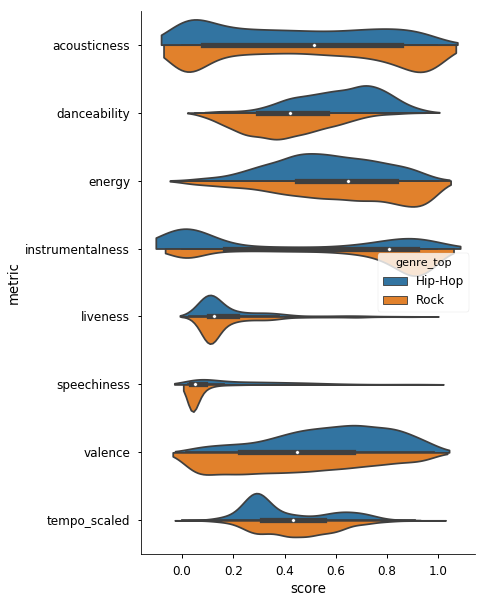

In [14]:
# Explore which variables are different between the two
# We should get them to do something like this, highly informative for getting a sense of which features matters!
echo_tracks['tempo_scaled'] = (echo_tracks['tempo'] - echo_tracks['tempo'].min()) / (
    echo_tracks['tempo'].max() - echo_tracks['tempo'].min())
echo_tracks_long = pd.melt(echo_tracks.drop(['track_id', 'title', 'tempo'], axis=1), id_vars=['genre_top'],
        var_name='metric', value_name='score')
plt.figure(figsize=(6, 10))
sns.set_context('notebook', font_scale=1.2)
sns.violinplot('score', 'metric', 'genre_top', echo_tracks_long, split=True, cut=1)
sns.despine()

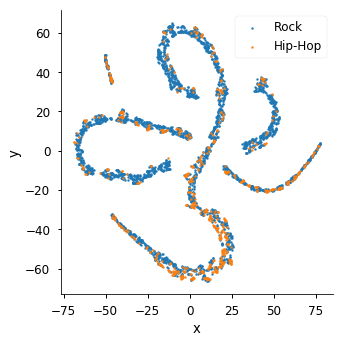

In [17]:
from sklearn.manifold import TSNE


tsne = TSNE(learning_rate=100)
plot_points = tsne.fit_transform(train_features)

plot_df = pd.DataFrame({'x': plot_points[:, 0],
                        'y': plot_points[:, 1],
                        'genre': train_labels.values})
g = sns.FacetGrid(plot_df, hue='genre', size=5)
g.map(plt.scatter, 'x', 'y', s=4)
g.ax.legend()

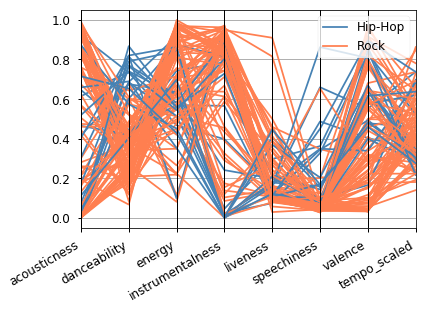

In [18]:
from pandas.plotting import parallel_coordinates

ax = parallel_coordinates(echo_tracks.drop(['track_id', 'title', 'tempo'], axis=1).sample(100),
                     class_column='genre_top', color=['steelblue', 'coral'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

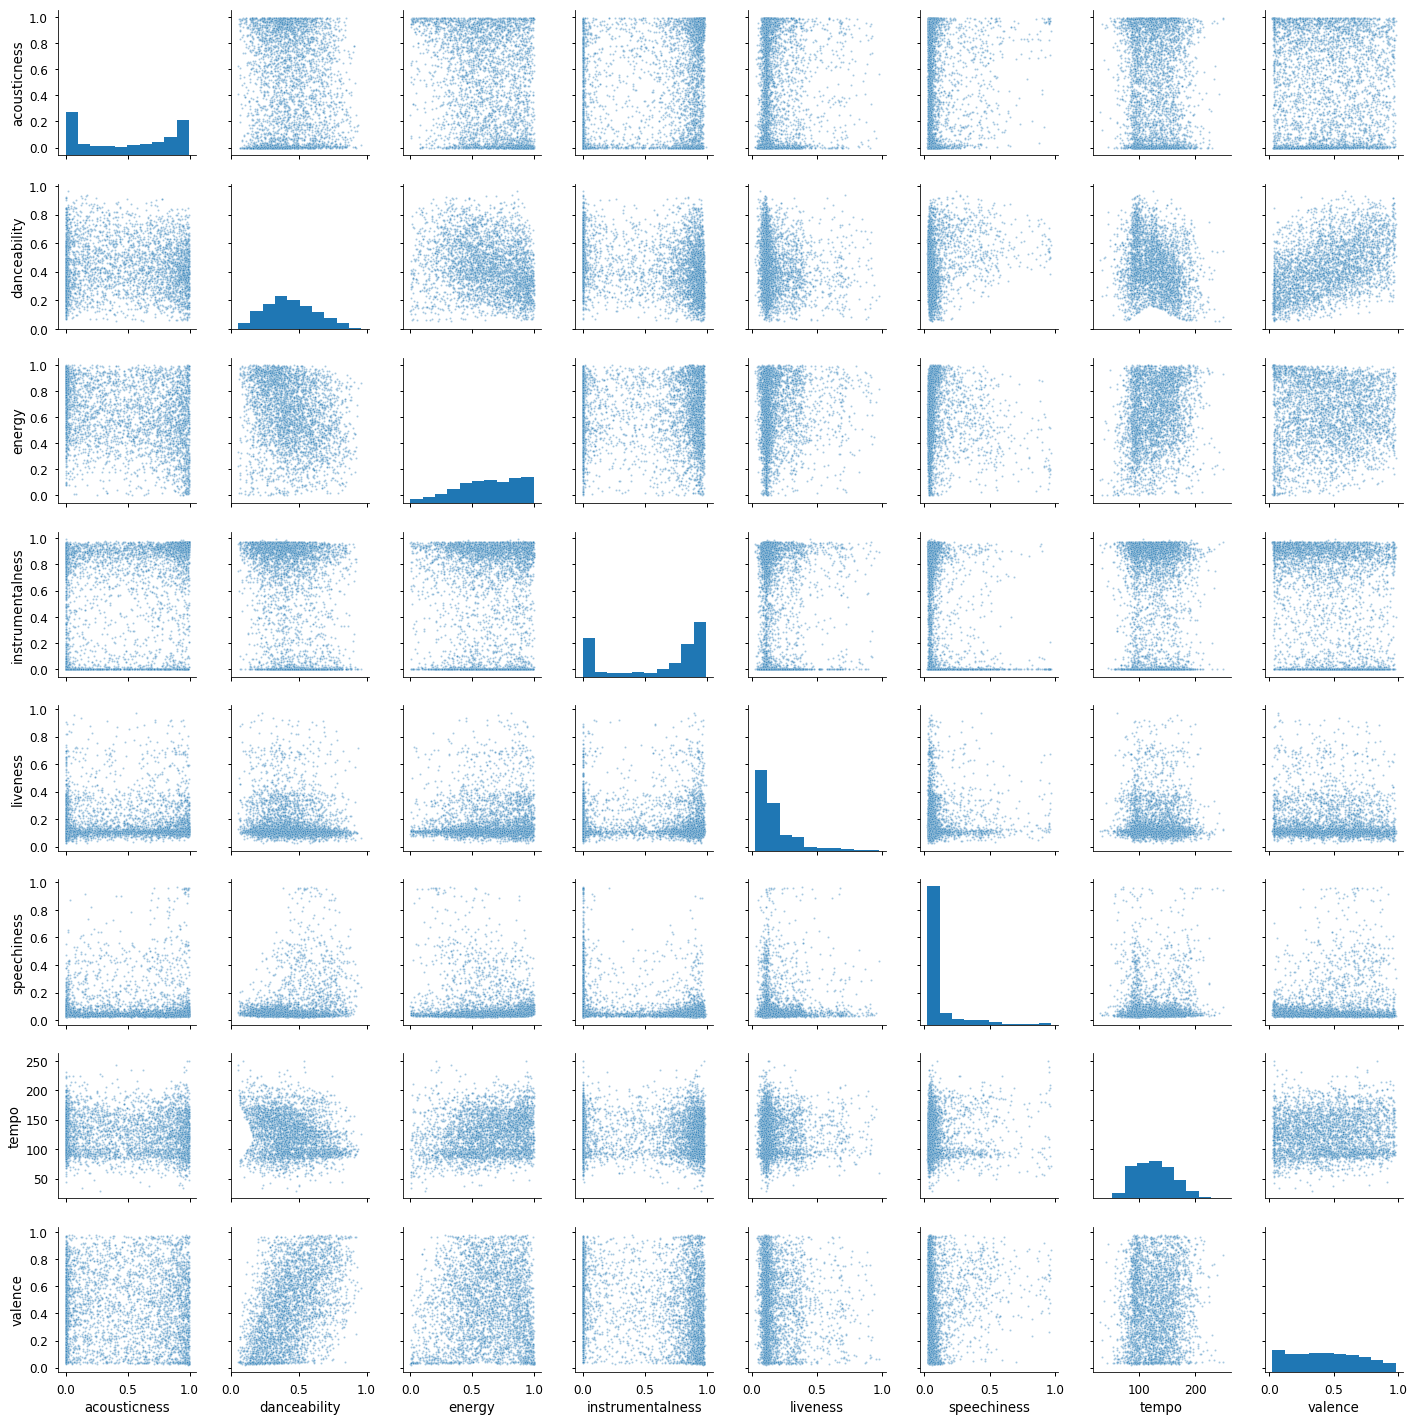

In [19]:
sns.pairplot(train_features, plot_kws={'s': 4, 'alpha': 0.4})

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute and print the confusion matrix and classification report
confusion_matrix(test_labels, predicted_labels)

In [ ]:
classification_report(test_labels, predicted_labels)